In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from src.IO import *
from src.functions import preprocess_LFP

In [6]:
data = load_dict_from_hdf5('data/datafile.h5')

In [2]:
new_data = load_dict_from_hdf5('data/sample.h5')

In [11]:
cond  = (data['t']<300)
new_data = {'Vext':data['ExtraCort'][cond],
            'params':{'dt':2e-5}}
save_dict_to_hdf5(new_data, 'data/sample.h5')

In [18]:
from src.functions import my_cwt
dt = 2e-5
new_dt = max([5e-4, dt])
my_cwt(new_data['Vext'][::int(new_dt/dt)],
       np.linspace(50, 70, 10), new_dt).shape

(10, 600000)

In [14]:
new_data['pLFP']

KeyError: 'pLFP'

In [3]:
f0, w0 = 72., 1.8

preprocess_LFP(new_data,
               gain = 1.,
               Vext_key='Vext',
               freqs = np.linspace(f0/w0, f0*w0, 10),
               # percentile_for_p0=self.set_p0_percentile.value()/100.,
               dt = new_data['params']['dt'],
               new_dt = 1e-3,
               smoothing= 40e-3)


KeyboardInterrupt: 

In [12]:
ls -lh data/

total 1553872
-rw-r--r--  1 yzerlaut  staff     0B Mar 25 11:29 _
-rwxr-xr-x  1 yzerlaut  staff   701M Mar 25 11:25 datafile.h5*
-rw-r--r--  1 yzerlaut  staff   2.6K Mar 25 11:24 last_params.npz
-rw-r--r--  1 yzerlaut  staff    57M Mar 25 14:07 sample.h5


In [10]:
data['t'][1]

2e-05

In [9]:
data['params']

{'ExtraCort_unit': 'mV',
 'Vm_unit': 'mV',
 'day': '2017_04_04',
 'dt': array([2.e-05]),
 'time': '14_40_12'}

(array([ 8., 11., 21., 18., 19., 14.,  6.,  2.,  0.,  1.]),
 array([-2.01258946, -1.43741327, -0.86223708, -0.28706089,  0.2881153 ,
         0.86329148,  1.43846767,  2.01364386,  2.58882005,  3.16399624,
         3.73917243]),
 <a list of 10 Patch objects>)

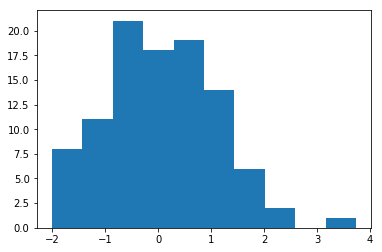

In [3]:
import sys
sys.path.append